In [846]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm
from scipy import stats


In [847]:
df = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 2/Phase 2 Project/dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')

In [848]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [356]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [849]:
df_sorted = df.sort_values(by='price', ascending=False)

In [850]:
# Removing outliers in price that are 3 standard deviations above the mean

In [851]:
df.drop(df[df['price'] >= 3797691].index, inplace = True)

In [852]:
df['price'].describe()

count    2.971800e+04
mean     1.038536e+06
std      5.981885e+05
min      2.736000e+04
25%      6.420000e+05
50%      8.510000e+05
75%      1.276000e+06
max      3.780000e+06
Name: price, dtype: float64

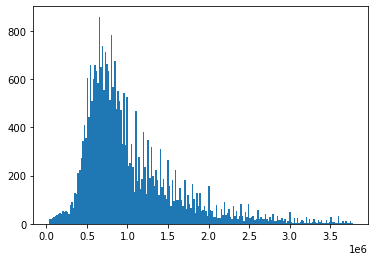

In [853]:
plt.hist(df['price'], bins = 200)
plt.show()

In [854]:
df['waterfront'].value_counts()

NO     29302
YES      416
Name: waterfront, dtype: int64

In [855]:
df['waterfront'].replace(['NO', 'YES'], [0,1], inplace = True)

In [856]:
df['greenbelt'].value_counts()

NO     28961
YES      757
Name: greenbelt, dtype: int64

In [857]:
df['greenbelt'].replace(['NO', 'YES'], [0, 1], inplace = True)

In [858]:
df['nuisance'].value_counts()

NO     24577
YES     5141
Name: nuisance, dtype: int64

In [859]:
df['nuisance'].replace(['NO', 'YES'], [0, 1], inplace = True)

In [860]:
df['view'].value_counts()

NONE         26395
AVERAGE       1849
GOOD           830
EXCELLENT      440
FAIR           204
Name: view, dtype: int64

In [861]:
df['view'].replace(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], [0, 1, 2, 3, 4], inplace = True)

In [862]:
df['view'].value_counts()

0    26395
2     1849
3      830
4      440
1      204
Name: view, dtype: int64

In [863]:
df['condition'].value_counts()

Average      18225
Good          7971
Very Good     3228
Fair           230
Poor            64
Name: condition, dtype: int64

In [864]:
df['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], [1, 2, 3, 4, 5], inplace = True)

In [865]:
df['condition'].value_counts()

3    18225
4     7971
5     3228
2      230
1       64
Name: condition, dtype: int64

In [866]:
df['grade'].value_counts()

7 Average        11688
8 Good            9369
9 Better          3744
6 Low Average     2847
10 Very Good      1271
5 Fair             390
11 Excellent       282
12 Luxury           56
4 Low               50
3 Poor              13
13 Mansion           4
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [867]:
df['grade'].replace(['1 Cabin', '2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

In [868]:
df['grade'].describe()

count    29718.000000
mean         7.614140
std          1.097868
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [869]:
# Calculate the mean and standard deviation
mean = df['grade'].mean()
std = df['grade'].std()

# Define the threshold for outliers
threshold = 3

# Create a boolean mask to identify outliers
outlier_mask = np.abs(df['grade'] - mean) > threshold * std

# Remove outliers from the DataFrame
df = df[~outlier_mask]
df['grade'].describe()

count    29309.000000
mean         7.581494
std          1.016457
min          5.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: grade, dtype: float64

In [870]:
#removing all the non-king county address'
df = df[df['address'].str.contains('98001|98002|98003|98004|98005|98006|98007|98008|98009|98010|98011|98013|98014|98015|98019|98022|98023|98024|98025|98027|98028|98029|98030|98031|98032|98033|98034|98035|98038|98039|98040|98041|98042|98045|98047|98050|98051|98052|98053|98054|98055|98056|98057|98058|98059|98062|98063|98064|98065|98068|98070|98071|98072|98073|98074|98075|98077|98083|98092|98093|98101|98102|98103|98104|98105|98106|98107|98108|98109|98111|98112|98114|98115|98116|98117|98118|98119|98121|98122|98124|98125|98126|98131|98132|98133|98134|98136|98138|98144|98145|98146|98148|98154|98155|98158|98160|98161|98164|98166|98168|98171|98174|98177|98178|98188|98198|98199|98224|98288')]

In [871]:
df['address'].value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States              24
Interlake Avenue North, Seattle, Washington 98103, United States              11
Northeast 201st Street, Woodinville, Washington 98072, United States          11
26th Avenue, Seattle, Washington 98122, United States                          7
12006 31st Ave NE, Seattle, Washington 98125, United States                    7
                                                                              ..
4364 6th Avenue Northwest, Seattle, Washington 98107, United States            1
26811 225th Place Southeast, Maple Valley, Washington 98038, United States     1
130 130th Avenue Southeast, Bellevue, Washington 98005, United States          1
22125 Northeast 62nd Place, Redmond, Washington 98053, United States           1
22609 Southeast 444th Street, Enumclaw, Washington 98022, United States        1
Name: address, Length: 28201, dtype: int64

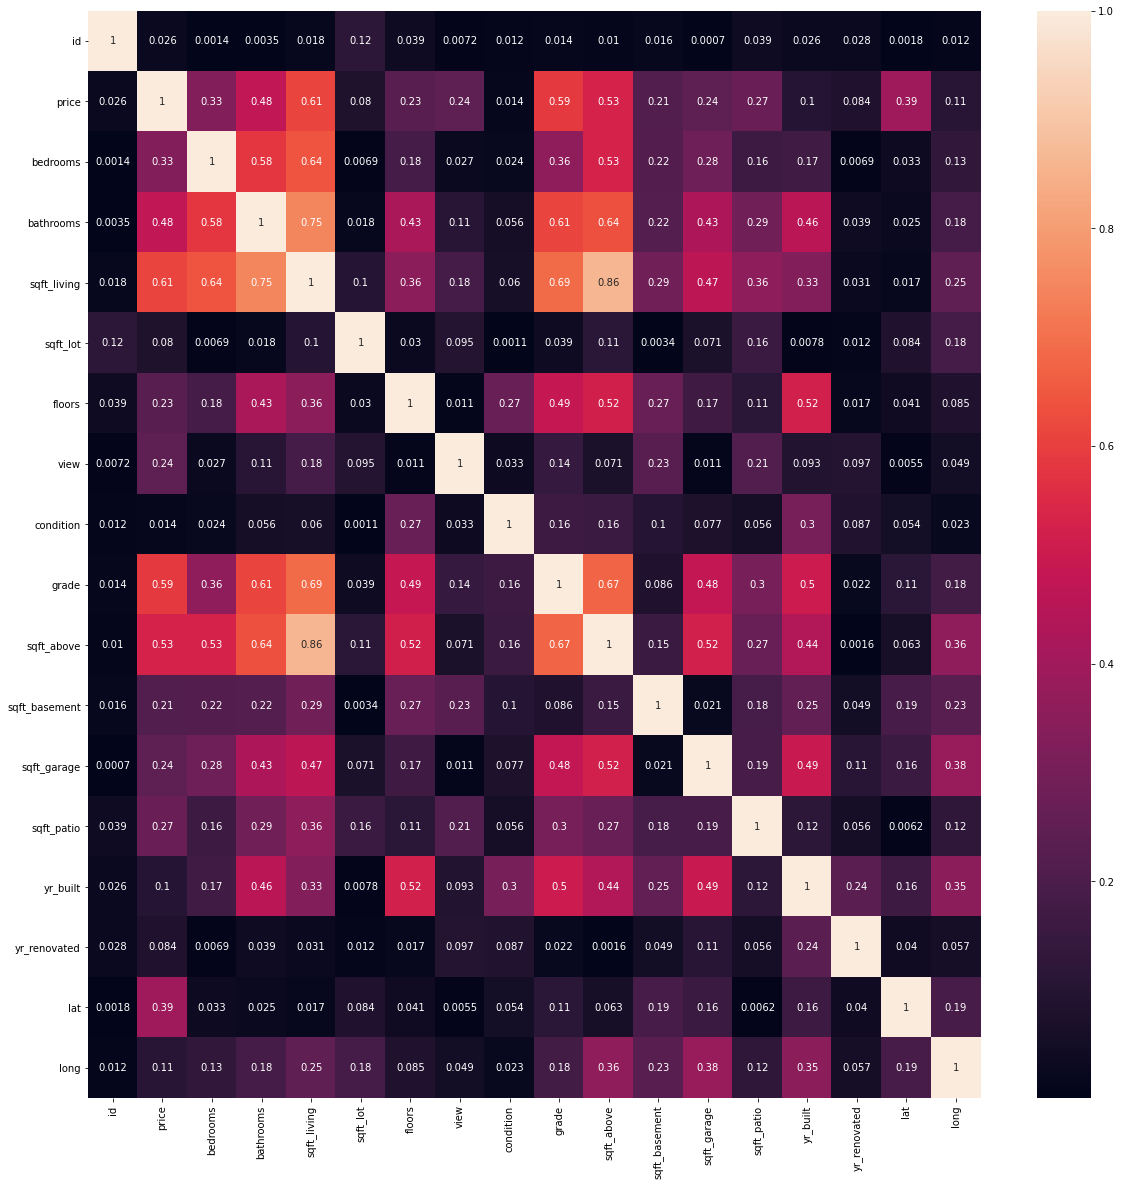

In [378]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

In [872]:
X = df['sqft_living']
y = df['price']

In [873]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        09:11:26   Log-Likelihood:            -4.0979e+05
No. Observations:               28359   AIC:                         8.196e+05
Df Residuals:                   28357   BIC:                         8.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.731e+05   7104.451     24.367      0.000    1.59e+05    1.87e+05
sqft_living   412.9951      3.178    129.940      0.000     406.765     419.225
==============================================================================
Omnibus:                     6261.025   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19782.827
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       6.414   Cond. No.                     5.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [874]:
## To Do:
# - use get_dummies on categorical variables to see coefficients
# - create columns for zip codes
# - remove outliers

In [875]:
X = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'sqft_above']]
y = df['price']

In [876]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4278.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        09:11:30   Log-Likelihood:            -4.0844e+05
No. Observations:               28359   AIC:                         8.169e+05
Df Residuals:                   28353   BIC:                         8.169e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.025e+05   2.42e+04    -33.201      0.000    -8.5e+05   -7.55e+05
sqft_living   351.6102      7.426     47.346      0.000     337.054     366.166
grade        1.818e+05   3726.162     48.803      0.000    1.75e+05    1.89e+05
bathrooms   -9710.8195   4914.273     -1.976      0.048   -1.93e+04     -78.610
bedrooms    -3.811e+04   3644.490    -10.457      0.000   -4.53e+04    -3.1e+04
sqft_above    -68.1398      6.629    -10.279      0.000     -81.133     -55.146
==============================================================================
Omnibus:                     6617.874   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23481.894
Skew:                           1.151   Prob(JB):                         0.00
Kurtosis:                       6.817   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [877]:
df['bathrooms'].describe()

count    28359.000000
mean         2.289714
std          0.835196
min          0.000000
25%          2.000000
50%          2.500000
75%          2.500000
max          7.500000
Name: bathrooms, dtype: float64

In [878]:
X = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'sqft_above']]
y = df['price']

In [879]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4278.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        09:11:32   Log-Likelihood:            -4.0844e+05
No. Observations:               28359   AIC:                         8.169e+05
Df Residuals:                   28353   BIC:                         8.169e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.025e+05   2.42e+04    -33.201      0.000    -8.5e+05   -7.55e+05
sqft_living   351.6102      7.426     47.346      0.000     337.054     366.166
grade        1.818e+05   3726.162     48.803      0.000    1.75e+05    1.89e+05
bathrooms   -9710.8195   4914.273     -1.976      0.048   -1.93e+04     -78.610
bedrooms    -3.811e+04   3644.490    -10.457      0.000   -4.53e+04    -3.1e+04
sqft_above    -68.1398      6.629    -10.279      0.000     -81.133     -55.146
==============================================================================
Omnibus:                     6617.874   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23481.894
Skew:                           1.151   Prob(JB):                         0.00
Kurtosis:                       6.817   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [880]:
df['zip'] = df['address'][-20:-15]
for i in df.index:
    address = df.loc[i, 'address']
    if pd.notnull(address):  # Skip if the address is NaN/Null
        df.loc[i, 'zip'] = address[-20:-15]

In [881]:
df['zip'] = df['zip'].astype(int)

In [882]:
df['zip'].describe()

count    28359.000000
mean     98077.973307
std         54.144741
min      98001.000000
25%      98032.000000
50%      98065.000000
75%      98117.000000
max      98288.000000
Name: zip, dtype: float64

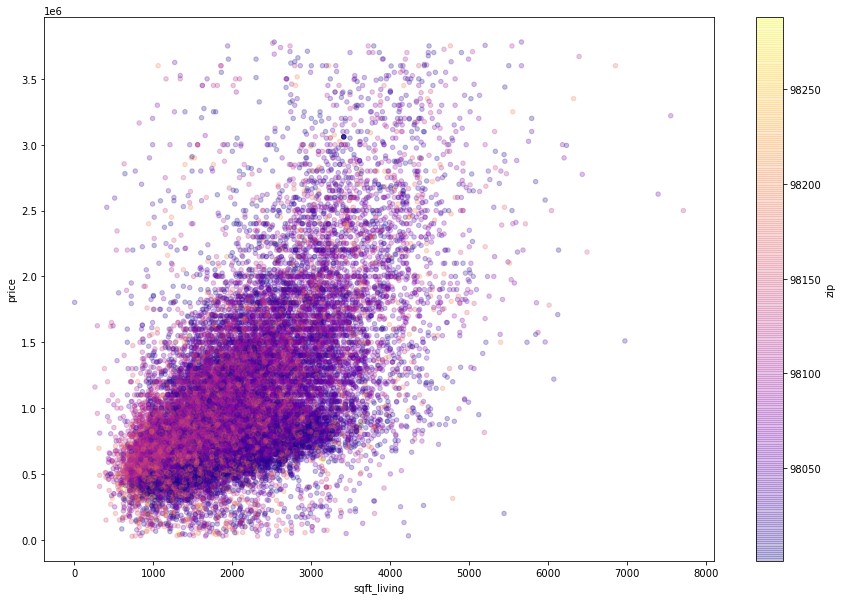

In [883]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot.scatter(x="sqft_living", y="price", c="zip", cmap="plasma", alpha=0.25, ax=ax);

In [884]:
X = df[['zip']]
y = df['price']

In [885]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.48e-41
Time:                        09:12:42   Log-Likelihood:            -4.1632e+05
No. Observations:               28359   AIC:                         8.326e+05
Df Residuals:                   28357   BIC:                         8.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.463e+07   6.18e+06     13.692      0.000    7.25e+07    9.67e+07
zip         -852.3693     63.017    -13.526      0.000    -975.885    -728.853
==============================================================================
Omnibus:                     8073.059   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21203.015
Skew:                           1.547   Prob(JB):                         0.00
Kurtosis:                       5.894   Cond. No.                     1.78e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [886]:
df_grouped = df.groupby('zip')['price'].mean().reset_index()

# Calculate quartiles for prices
quartiles = pd.qcut(df_grouped['price'], q=[0, 0.25, 0.75, 1], labels=['Lower 25%', 'Middle 50%', 'Top 75%'])

# Add the quartile column to the grouped DataFrame
df_grouped['quartile'] = quartiles

In [887]:
df_grouped['quartile']

0     Lower 25%
1     Lower 25%
2     Lower 25%
3       Top 75%
4       Top 75%
        ...    
71    Lower 25%
72    Lower 25%
73      Top 75%
74    Lower 25%
75    Lower 25%
Name: quartile, Length: 76, dtype: category
Categories (3, object): ['Lower 25%' < 'Middle 50%' < 'Top 75%']

In [888]:
pd.set_option('display.max_rows', None)
df_grouped

,zip,price,quartile
0,98001,6.156828e+05,Lower 25%
1,98002,4.754262e+05,Lower 25%
2,98003,5.815506e+05,Lower 25%
3,98004,2.321764e+06,Top 75%
4,98005,1.929213e+06,Top 75%
5,98006,1.686029e+06,Top 75%
6,98007,1.398943e+06,Middle 50%
7,98008,1.435106e+06,Top 75%
8,98010,8.297747e+05,Middle 50%
9,98011,1.197163e+06,Middle 50%


In [889]:
pd.reset_option('display.max_rows')

In [890]:
numbers_to_search = [98001, 98002, 98003, 98022, 98023, 98030, 98031, 98032, 98042, 98047, 98057, 98106, 98148, 98168, 98178, 98188, 98198, 98224, 98288]

# Create a new column "x" based on the presence of the numbers
df['lower_25_zip'] = df['zip'].isin(numbers_to_search).astype(int)
df['lower_25_zip']

0        0
1        0
2        1
3        0
4        0
        ..
30150    0
30151    0
30152    0
30153    0
30154    1
Name: lower_25_zip, Length: 28359, dtype: int64

In [891]:
numbers_to_search = [98007, 98010, 98011, 98014, 98019, 98024, 98027, 98028, 98034, 98038, 98045, 98051, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98092, 98103, 98105, 98107, 98108, 98115, 98116, 98117, 98118, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98155, 98166, 98177]
df['middle_50_zip'] = df['zip'].isin(numbers_to_search).astype(int)

In [892]:
numbers_to_search = [98004, 98005, 98006, 98008, 98029, 98033, 98039, 98040, 98050, 98052, 98053, 98074, 98075, 98077, 98102, 98109, 98112, 98119, 98199]
df['top_75_zip'] = df['zip'].isin(numbers_to_search).astype(int)

In [893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28359 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28359 non-null  int64  
 1   date           28359 non-null  object 
 2   price          28359 non-null  float64
 3   bedrooms       28359 non-null  int64  
 4   bathrooms      28359 non-null  float64
 5   sqft_living    28359 non-null  int64  
 6   sqft_lot       28359 non-null  int64  
 7   floors         28359 non-null  float64
 8   waterfront     28359 non-null  int64  
 9   greenbelt      28359 non-null  int64  
 10  nuisance       28359 non-null  int64  
 11  view           28359 non-null  int64  
 12  condition      28359 non-null  int64  
 13  grade          28359 non-null  int64  
 14  heat_source    28342 non-null  object 
 15  sewer_system   28348 non-null  object 
 16  sqft_above     28359 non-null  int64  
 17  sqft_basement  28359 non-null  int64  
 18  sqft_g

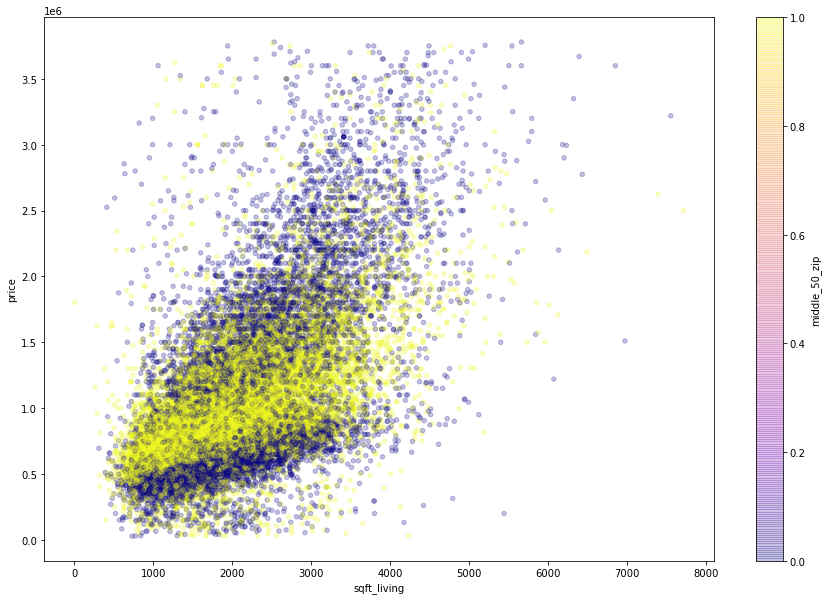

In [894]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot.scatter(x="sqft_living", y="price", c="middle_50_zip", cmap="plasma", alpha=0.25, ax=ax);

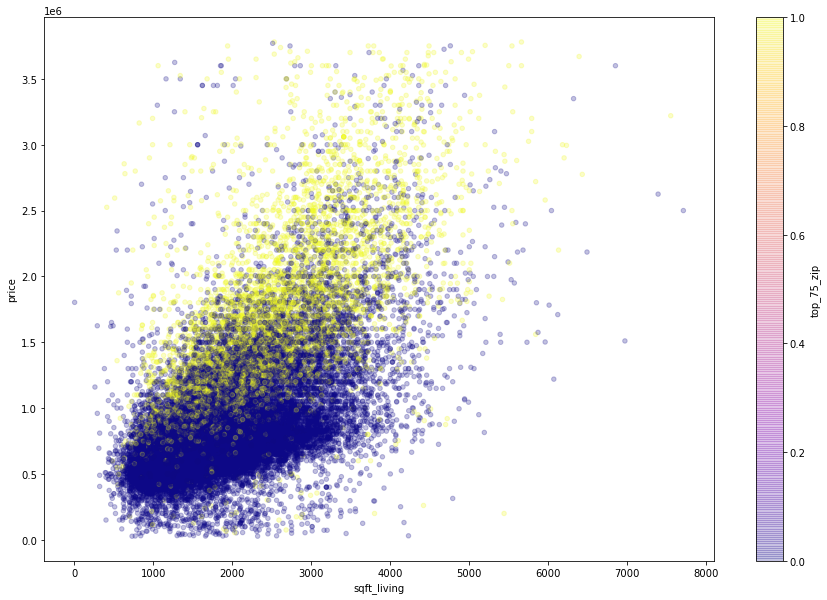

In [895]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot.scatter(x="sqft_living", y="price", c="top_75_zip", cmap="plasma", alpha=0.25, ax=ax);

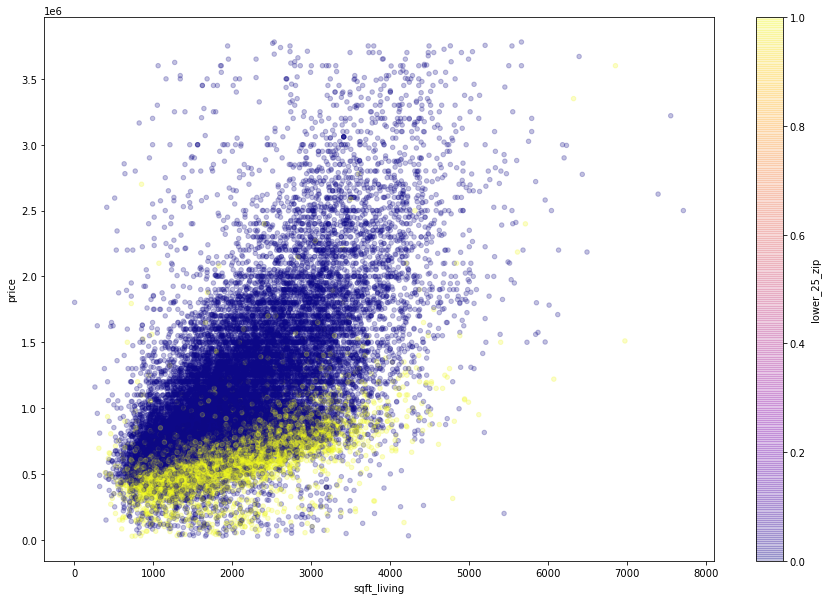

In [896]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot.scatter(x="sqft_living", y="price", c="lower_25_zip", cmap="plasma", alpha=0.25, ax=ax);

In [939]:
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'condition', 'lower_25_zip', 'middle_50_zip', 'top_75_zip', 'waterfront', 'view', 'year', 'distance_seattle', 'distance_bellvue', 'distance_bothell', 'distance_renton', 'distance_redmond', 'distance_kirkland', 'distance_burien', 'distance_shoreline', 'sqft_bath']]
y = df['price']

In [940]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     3878.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        09:17:05   Log-Likelihood:            -3.9825e+05
No. Observations:               28359   AIC:                         7.965e+05
Df Residuals:                   28339   BIC:                         7.967e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.43e+08   5.71e+06    -42.578      0.000   -2.54e+08   -2.32e+08
sqft_living           67.2612      9.577      7.024      0.000      48.491      86.032
grade               7.992e+04   2653.555     30.119      0.000    7.47e+04    8.51e+04
sqft_above           170.7685      8.323     20.518      0.000     154.455     187.082
sqft_basement         39.1112      6.231      6.277      0.000      26.898      51.325
condition           7.149e+04   2660.295     26.873      0.000    6.63e+04    7.67e+04
lower_25_zip       -8.111e+07    1.9e+06    -42.642      0.000   -8.48e+07   -7.74e+07
middle_50_zip      -8.106e+07    1.9e+06    -42.614      0.000   -8.48e+07   -7.73e+07
top_75_zip         -8.079e+07    1.9e+06    -42.477      0.000   -8.45e+07   -7.71e+07
waterfront          3.022e+05    1.7e+04     17.762      0.000    2.69e+05    3.36e+05
view                8.229e+04   2545.529     32.326      0.000    7.73e+04    8.73e+04
year                  1.6e+05   3763.710     42.499      0.000    1.53e+05    1.67e+05
distance_seattle    3.324e+04   1912.543     17.382      0.000    2.95e+04     3.7e+04
distance_bellvue   -9.897e+04   3497.824    -28.294      0.000   -1.06e+05   -9.21e+04
distance_bothell    2.417e+04   2581.304      9.362      0.000    1.91e+04    2.92e+04
distance_renton     5.173e+04   1611.617     32.100      0.000    4.86e+04    5.49e+04
distance_redmond    6.712e+04   2692.117     24.934      0.000    6.18e+04    7.24e+04
distance_kirkland  -8.225e+04   3664.891    -22.441      0.000   -8.94e+04   -7.51e+04
distance_burien    -8741.4120   1315.629     -6.644      0.000   -1.13e+04   -6162.716
distance_shoreline  1.279e+04   1594.970      8.017      0.000    9660.421    1.59e+04
sqft_bath             18.8501      1.225     15.382      0.000      16.448      21.252
==============================================================================
Omnibus:                     7038.604   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89345.710
Skew:                           0.836   Prob(JB):                         0.00
Kurtosis:                      11.533   Cond. No.                     1.75e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.98e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [899]:
df['lat_long'] = df['lat']*df['long']

In [900]:
df['date'].head()

0     5/24/2022
1    12/13/2021
2     9/29/2021
3    12/14/2021
4     8/24/2021
Name: date, dtype: object

In [901]:
df['date'] = pd.to_datetime(df['date'])

In [902]:
df['date']

0       2022-05-24
1       2021-12-13
2       2021-09-29
3       2021-12-14
4       2021-08-24
           ...    
30150   2021-11-30
30151   2021-06-16
30152   2022-05-27
30153   2022-02-24
30154   2022-04-29
Name: date, Length: 28359, dtype: datetime64[ns]

In [903]:
df['year'] = df['date'].dt.year.astype(str).str[:4]
df['year']

0        2022
1        2021
2        2021
3        2021
4        2021
         ... 
30150    2021
30151    2021
30152    2022
30153    2022
30154    2022
Name: year, Length: 28359, dtype: object

In [904]:
df['year'] = df['year'].astype(int)

In [905]:
df['year_cond'] = df['year']*df['condition']

In [906]:
df['year'].value_counts()

2021    18127
2022    10232
Name: year, dtype: int64

In [907]:
df['date'].value_counts()

2021-07-01    187
2021-08-02    169
2021-06-23    168
2021-07-06    168
2021-06-24    167
             ... 
2022-01-16      1
2021-12-05      1
2021-12-26      1
2021-12-25      1
2022-06-09      1
Name: date, Length: 364, dtype: int64

In [908]:
df['yr_renovated_sub_yr_sold'] = df['year']-df['yr_renovated']
df['yr_renovated_sub_yr_sold']

0        2022
1        2021
2        2021
3        2021
4        2021
         ... 
30150    2021
30151    2021
30152    2022
30153    2022
30154    2022
Name: yr_renovated_sub_yr_sold, Length: 28359, dtype: int64

In [909]:
df['yr_renovated_sub_yr_sold'].value_counts()

2021    17287
2022     9767
0          51
1          48
4          45
        ...  
82          1
98          1
70          1
91          1
79          1
Name: yr_renovated_sub_yr_sold, Length: 86, dtype: int64

In [910]:
df['month'] = df['date'].dt.month
df['month']

0         5
1        12
2         9
3        12
4         8
         ..
30150    11
30151     6
30152     5
30153     2
30154     4
Name: month, Length: 28359, dtype: int64

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28359 entries, 0 to 30154
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        28359 non-null  int64         
 1   date                      28359 non-null  datetime64[ns]
 2   price                     28359 non-null  float64       
 3   bedrooms                  28359 non-null  int64         
 4   bathrooms                 28359 non-null  float64       
 5   sqft_living               28359 non-null  int64         
 6   sqft_lot                  28359 non-null  int64         
 7   floors                    28359 non-null  float64       
 8   waterfront                28359 non-null  int64         
 9   greenbelt                 28359 non-null  int64         
 10  nuisance                  28359 non-null  int64         
 11  view                      28359 non-null  int64         
 12  condition         

In [912]:
df['month_year'] = df['month']*df['year']
df['month_year']

0        10110
1        24252
2        18189
3        24252
4        16168
         ...  
30150    22231
30151    12126
30152    10110
30153     4044
30154     8088
Name: month_year, Length: 28359, dtype: int64

In [913]:
df['floors'].value_counts()

1.0    13737
2.0    11172
1.5     2391
3.0      845
2.5      181
4.0       25
3.5        8
Name: floors, dtype: int64

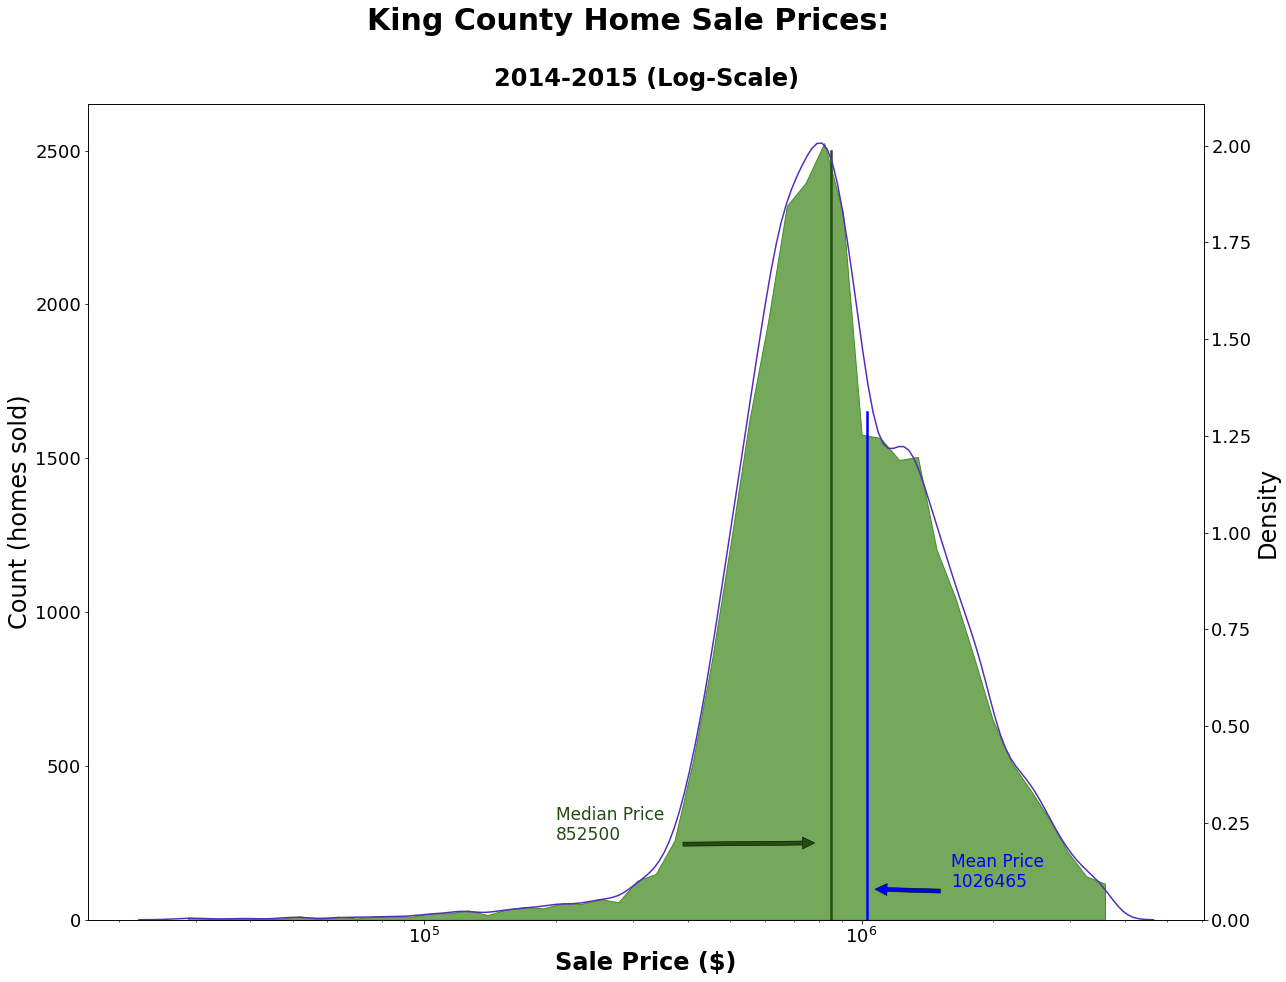

In [914]:
x=df['price']
x_mean = np.mean(x)
x_median = np.median(x)
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle('King County Home Sale Prices:', fontsize=30, fontweight='bold',y=0.97)
sns.histplot(x, ax=ax, bins=50, color="#458D25", log_scale=True, element='poly')
plt.plot([x_mean,x_mean],[0,1650], color="blue",linewidth=2.5)
ax.annotate(('Mean Price\n' + str(int(x_mean))), xy=(x_mean,100), xytext=(1600000,105), \
            arrowprops=dict(facecolor='blue', shrink=0.1, linewidth=0.5), fontsize=17,color="blue")
plt.plot([x_median,x_median],[0,2500], color="#244C12",linewidth=2.5)
ax.annotate(('Median Price\n' + str(int(x_median))), xy=(x_median,250), xytext=(200000,258), \
            arrowprops=dict(facecolor='#244C12', shrink=0.1, linewidth=0.5), fontsize=17,color="#244C12")
plt.xlabel('Sale Price ($)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=18)
plt.ylabel('Count (homes sold)', fontsize=24,x=.95)
plt.yticks(fontsize=18)
ax2 = ax.twinx()
sns.kdeplot(x, ax=ax2, color="#552cbf", log_scale=True)
plt.title('2014-2015 (Log-Scale)', fontsize=24, fontweight='bold',y=1.015)
plt.yticks(fontsize=18)
plt.ylabel('Density', fontsize=24,x=1.1);

/Users/seamuswalsh/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


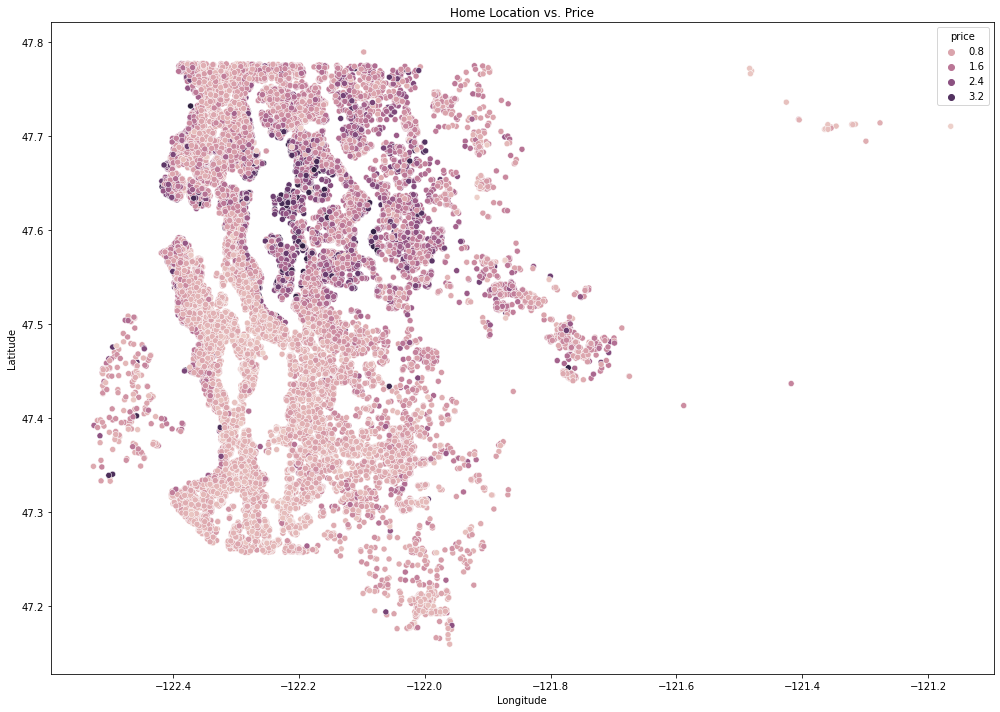

In [915]:
plt.figure(figsize=(14, 10))
plt.title('Home Location vs. Price')
sns.scatterplot(df['long'], df['lat'], hue=df['price'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [916]:
df['area'] = df['sqft_living'] * df['bedrooms']* df['sqft_basement']

In [917]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [918]:
from geopy import distance

In [919]:
def distance_from(lat, long, series_lat, series_long):
    '''
    Creates a list with distances from the coordinate given by
    the first two arguments, to the coordinate given by the two
    second arguments.
    '''
    lat_long = series_lat.astype(str) + ',' + series_long.astype(str)
    lat_long = list(map(eval, lat_long))
    coordinates = (lat, long)
    miles = []
    for i in lat_long:
        miles.append(round(distance.distance(i, coordinates).miles, 1))
    return miles

In [920]:
df['distance_seattle'] = distance_from(47.6097, -122.3331, df['lat'], df['long'])

In [921]:
df['distance_bellvue'] = distance_from(47.6101, -122.2015, df['lat'], df['long'])

In [922]:
df['distance_kent'] = distance_from(47.3809, -122.2348, df['lat'], df['long'])

In [923]:
df['distance_federal_way'] = distance_from(47.3165, -122.3222, df['lat'], df['long'])

In [924]:
df['distance_bothell'] = distance_from(47.7601, -122.2054, df['lat'], df['long'])

In [925]:
df['distance_burien'] = distance_from(47.4704, -122.3468, df['lat'], df['long'])

In [926]:
df['distance_auburn'] = distance_from(47.3073, -122.2285, df['lat'], df['long'])

In [927]:
df['distance_renton'] = distance_from(47.4829, -122.2171, df['lat'], df['long'])

In [928]:
df['distance_redmond'] = distance_from(47.6740, -122.1215, df['lat'], df['long'])

In [929]:
df['distance_sammamish'] = distance_from(47.6114, -122.0357, df['lat'], df['long'])

In [930]:
df['distance_kirkland'] = distance_from(47.6777, -122.2060, df['lat'], df['long'])

In [931]:
df['distance_shoreline'] = distance_from(47.7565, -122.3422, df['lat'], df['long'])

In [932]:
df['distance_agg'] = df['distance_seattle'] *df['distance_bellvue']* df['distance_kent']* df['distance_federal_way']* df['distance_bothell']* df['distance_burien']* df['distance_auburn']* df['distance_renton']* df['distance_redmond']* df['distance_sammamish']* df['distance_kirkland']

In [933]:
df['distanceXcondition'] = df['distance_seattle'] * df['condition']

In [934]:
df['cond_grade'] = df['condition'] * df['grade']

In [935]:
df['sqft_bath'] = df['sqft_living'] * df['bathrooms']

In [936]:
df['sqft_agg'] = df['sqft_living'] * df['sqft_above']

In [937]:
df.corr()['price']

id                         -0.026081
price                       1.000000
bedrooms                    0.328816
bathrooms                   0.476573
sqft_living                 0.610906
sqft_lot                    0.080484
floors                      0.233031
waterfront                  0.088813
greenbelt                   0.086410
nuisance                   -0.009794
view                        0.243800
condition                   0.013668
grade                       0.586623
sqft_above                  0.528351
sqft_basement               0.214923
sqft_garage                 0.243063
sqft_patio                  0.270758
yr_built                    0.100492
yr_renovated                0.084215
lat                         0.394743
long                        0.107560
zip                        -0.080065
lower_25_zip               -0.400394
middle_50_zip              -0.079245
top_75_zip                  0.534195
lat_long                   -0.311589
year                        0.103350
y

In [950]:
df['sqft_living_grade'] = df['sqft_living'] * df['grade']


In [955]:
X = df[['sqft_living', 'grade', 'sqft_living_grade', 'yr_renovated', 'sqft_above', 'sqft_basement', 'condition', 'floors', 'lower_25_zip', 'middle_50_zip', 'top_75_zip', 'waterfront', 'view', 'year', 'distance_seattle', 'distance_bellvue', 'distance_bothell', 'distance_renton', 'distance_redmond', 'distance_kirkland', 'distance_burien', 'distance_shoreline', 'sqft_bath']]
y = df['price']

In [956]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     3606.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        09:35:32   Log-Likelihood:            -3.9748e+05
No. Observations:               28359   AIC:                         7.950e+05
Df Residuals:                   28336   BIC:                         7.952e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.403e+08   5.55e+06    -43.259      0.000   -2.51e+08   -2.29e+08
sqft_living         -358.6072     15.875    -22.590      0.000    -389.722    -327.492
grade              -2.579e+04   4639.313     -5.559      0.000   -3.49e+04   -1.67e+04
sqft_living_grade     59.3623      1.862     31.881      0.000      55.713      63.012
yr_renovated          57.6542      4.287     13.449      0.000      49.252      66.056
sqft_above           162.7807      8.267     19.690      0.000     146.576     178.985
sqft_basement         27.5335      6.189      4.449      0.000      15.402      39.665
condition           7.021e+04   2638.310     26.612      0.000     6.5e+04    7.54e+04
floors             -5.398e+04   4650.675    -11.606      0.000   -6.31e+04   -4.49e+04
lower_25_zip       -8.022e+07   1.85e+06    -43.322      0.000   -8.38e+07   -7.66e+07
middle_50_zip      -8.016e+07   1.85e+06    -43.293      0.000   -8.38e+07   -7.65e+07
top_75_zip         -7.991e+07   1.85e+06    -43.160      0.000   -8.35e+07   -7.63e+07
waterfront          2.865e+05   1.66e+04     17.258      0.000    2.54e+05    3.19e+05
view                7.206e+04   2492.132     28.914      0.000    6.72e+04    7.69e+04
year                1.586e+05   3663.760     43.293      0.000    1.51e+05    1.66e+05
distance_seattle    2.238e+04   1945.036     11.505      0.000    1.86e+04    2.62e+04
distance_bellvue   -8.753e+04   3430.412    -25.517      0.000   -9.43e+04   -8.08e+04
distance_bothell    2.294e+04   2514.769      9.124      0.000     1.8e+04    2.79e+04
distance_renton      4.71e+04   1575.321     29.899      0.000     4.4e+04    5.02e+04
distance_redmond     6.45e+04   2626.064     24.560      0.000    5.93e+04    6.96e+04
distance_kirkland  -8.312e+04   3568.411    -23.293      0.000   -9.01e+04   -7.61e+04
distance_burien    -2848.5613   1308.751     -2.177      0.030   -5413.776    -283.347
distance_shoreline   1.68e+04   1559.185     10.775      0.000    1.37e+04    1.99e+04
sqft_bath              8.9792      1.264      7.105      0.000       6.502      11.456
==============================================================================
Omnibus:                     6891.443   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117714.566
Skew:                           0.720   Prob(JB):                         0.00
Kurtosis:                      12.877   Cond. No.                     4.70e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.98e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [957]:
df['bedrooms'].describe()

count    28359.000000
mean         3.416975
std          0.961753
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64